In [2]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [3]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [4]:
scenario_SI = 0
coarsenscale = 3

xr_out = xr.open_dataset('Output\\xr_output_SSI_' + str(scenario_SI) + "_CS_"+ str(coarsenscale)+ '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())

<xarray.Dataset>
Dimensions:    (lat: 1069, lon: 597)
Coordinates:
  * lat        (lat) float64 5.621 5.635 5.649 5.663 ... 20.41 20.43 20.44 20.45
  * lon        (lon) float64 97.35 97.37 97.38 97.39 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 ...
    SI_Wind    (lat, lon) float64 ...
    AVA_Wind   (lat, lon) float32 ...
    AVA_Solar  (lat, lon) float32 ...
    ADM1_EN    (lat, lon) object ...
    region     (lat, lon) object ...
    cap_wind   (lat, lon) float64 ...
    cap_solar  (lat, lon) float64 ...
cap_wind =  <xarray.DataArray 'cap_wind' ()>
array(30138.07574617)
cap_solar =  <xarray.DataArray 'cap_solar' ()>
array(1176255.03552804)


In [5]:
df_wind = xr_out.to_dataframe()
xr_out.close()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
print(len(df_wind))
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
df_wind.reset_index(inplace=True,drop=False)
df_wind.crs = {'init': 'epsg:4326'}
df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
df_wind = df_wind.set_geometry('buffer')

df_wind.to_csv('Output\\Output_wind_SSI_' + str(scenario_SI)+ "_CS_" + str(coarsenscale) + '.csv',index=False,encoding="utf-8-sig")

print(df_wind)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


638193


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_38196\3128496745.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)


       index        lat         lon   SI_Wind  AVA_Wind     ADM1_EN region  \
0      27178   6.245833  101.698611  0.693465      1.17  Narathiwat     R3   
1      31310   6.343056  101.045833  0.507800      0.90        Yala     R3   
2      31906   6.356944  101.031944  0.511859      0.90        Yala     R3   
3      31914   6.356944  101.143056  0.237255      0.45        Yala     R3   
4      31915   6.356944  101.156944  0.226208      0.45        Yala     R3   
...      ...        ...         ...       ...       ...         ...    ...   
4935  615110  19.926389  100.129167  1.402229      2.25  Chiang Rai     R4   
4936  615140  19.926389  100.545833  0.110012      0.27  Chiang Rai     R4   
4937  615141  19.926389  100.559722  0.523765      1.26  Chiang Rai     R4   
4938  615706  19.940278  100.115278  0.130294      0.27  Chiang Rai     R4   
4939  615707  19.940278  100.129167  0.430927      0.90  Chiang Rai     R4   

      cap_wind                    geometry  \
0        5.265   

In [6]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
print(len(df_solar))
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
df_solar.reset_index(inplace=True,drop=False)
df_solar.crs = {'init': 'epsg:4326'}
df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
df_solar = df_solar.set_geometry('buffer')

df_solar.to_csv('Output\\Output_solar_SSI_' + str(scenario_SI)+ "_CS_" + str(coarsenscale) + '.csv',index=False,encoding="utf-8-sig")

print(df_solar)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


638193


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_38196\4263331687.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)


        index        lat         lon  SI_Solar  AVA_Solar     ADM1_EN region  \
0        8631   5.815278  101.143056  0.063453       0.09        Yala     R3   
1       12265   5.898611  101.865278  0.626819       0.63  Narathiwat     R3   
2       12266   5.898611  101.879167  0.732460       0.72  Narathiwat     R3   
3       12861   5.912500  101.851389  0.236434       0.27  Narathiwat     R3   
4       12862   5.912500  101.865278  0.080546       0.09  Narathiwat     R3   
...       ...        ...         ...       ...        ...         ...    ...   
91651  635405  20.398611  100.087500  0.299122       0.36  Chiang Rai     R4   
91652  635406  20.398611  100.101389  1.259007       1.35  Chiang Rai     R4   
91653  635407  20.398611  100.115278  0.260293       0.27  Chiang Rai     R4   
91654  636003  20.412500  100.101389  0.480349       0.54  Chiang Rai     R4   
91655  636004  20.412500  100.115278  1.084206       1.17  Chiang Rai     R4   

       cap_solar                    geo

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  30138.075746165552
R0 wind =  0.0
R1 wind =  5782.99516327719
R2 wind =  6089.58014340734
R3 wind =  14972.04035447622
R4 wind =  3293.4600850048


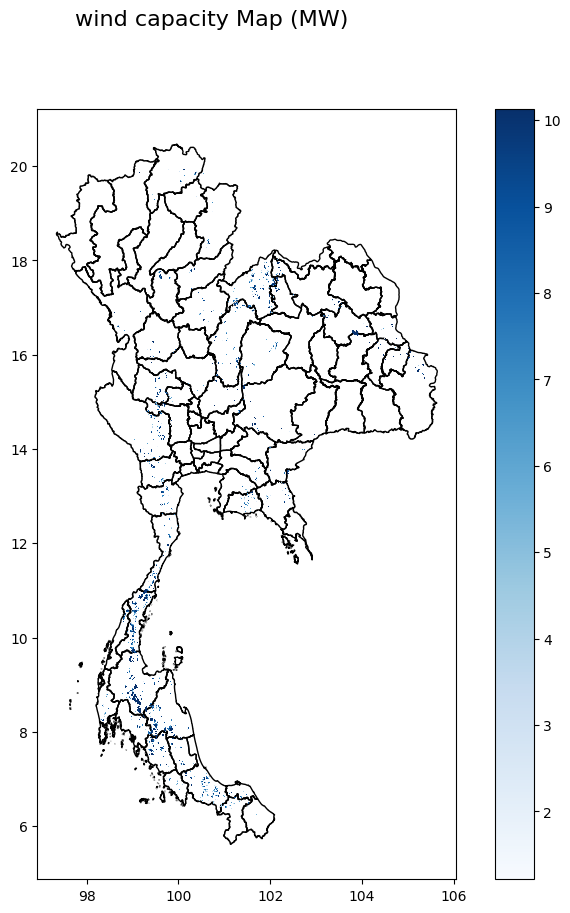

In [7]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())
print("R0 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R0'].sum())
print("R1 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R1'].sum())
print("R2 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R2'].sum())
print("R3 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R3'].sum())
print("R4 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind capacity Map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None

total solar capacity =  1176255.035528039
R0 Solar =  5714.55015599714
R1 Solar =  247671.00711463316
R2 Solar =  510389.1166846281
R3 Solar =  133331.40385194856
R4 Solar =  279148.95772083226


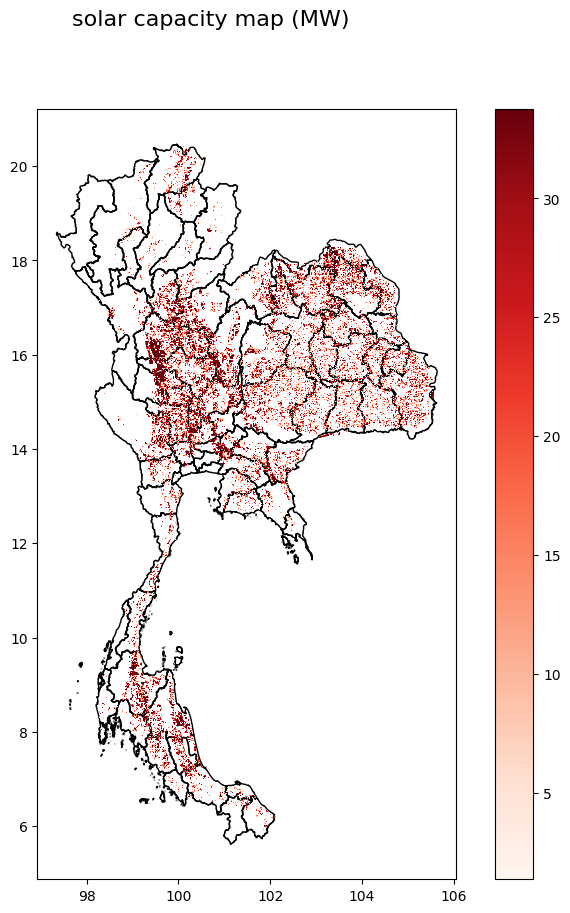

In [8]:
print("total solar capacity = ", df_solar['cap_solar'].sum())
print("R0 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R0'].sum())
print("R1 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R1'].sum())
print("R2 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R2'].sum())
print("R3 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R3'].sum())
print("R4 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_solar',cmap = 'Reds')
except:
    None


In [9]:
region = pd.read_csv('Data\\Region.csv',index_col=False)
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
list_region = []
count = 0
for i in thailandmap['ADM1_TH']:
    r = region['region'].loc[region['province'] == i]
    try : 
        # print(i,r.values[0])
        list_region.append(r.values[0])
    except :
        print(i,'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
        list_region.append('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
thailandmap['region'] = list_region

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  3293.4600850048
total solar capacity =  279148.95772083226


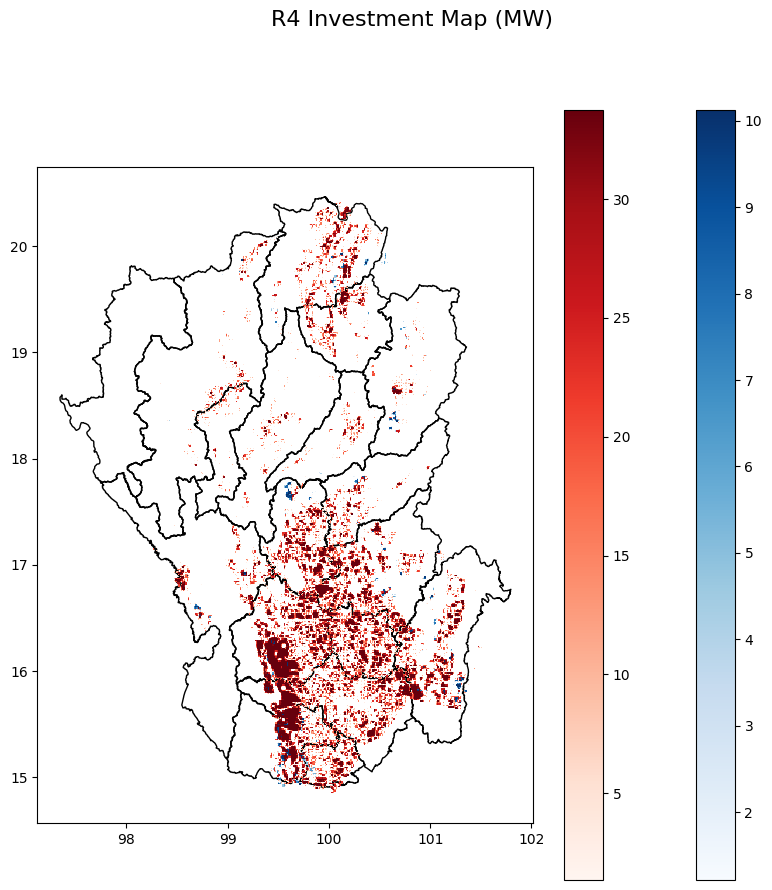

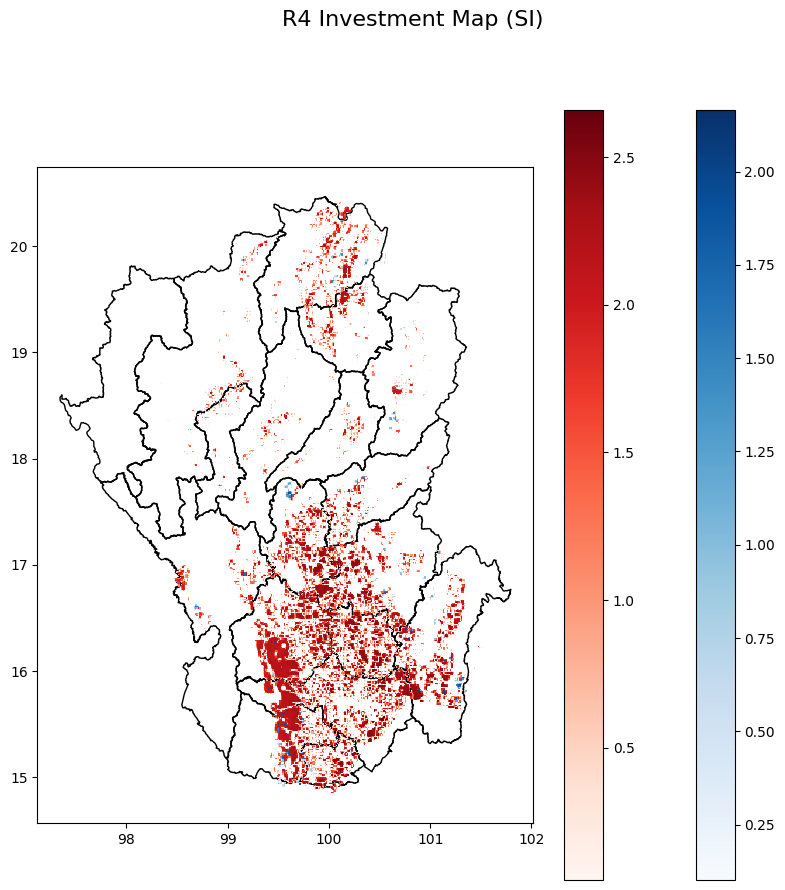

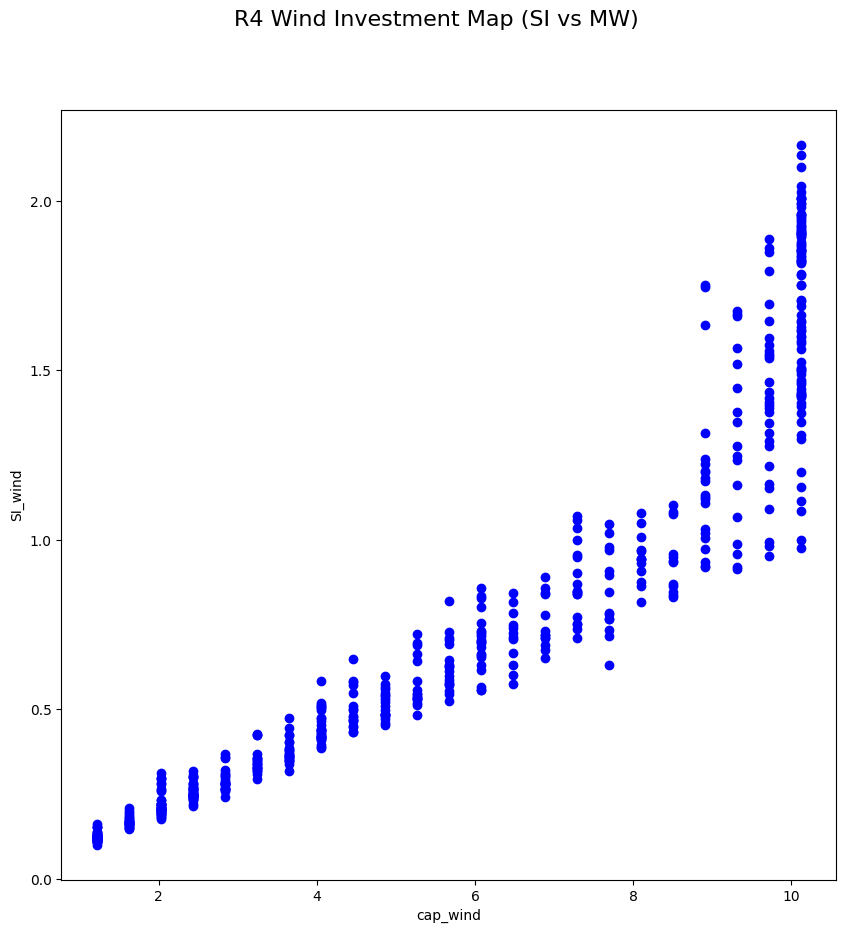

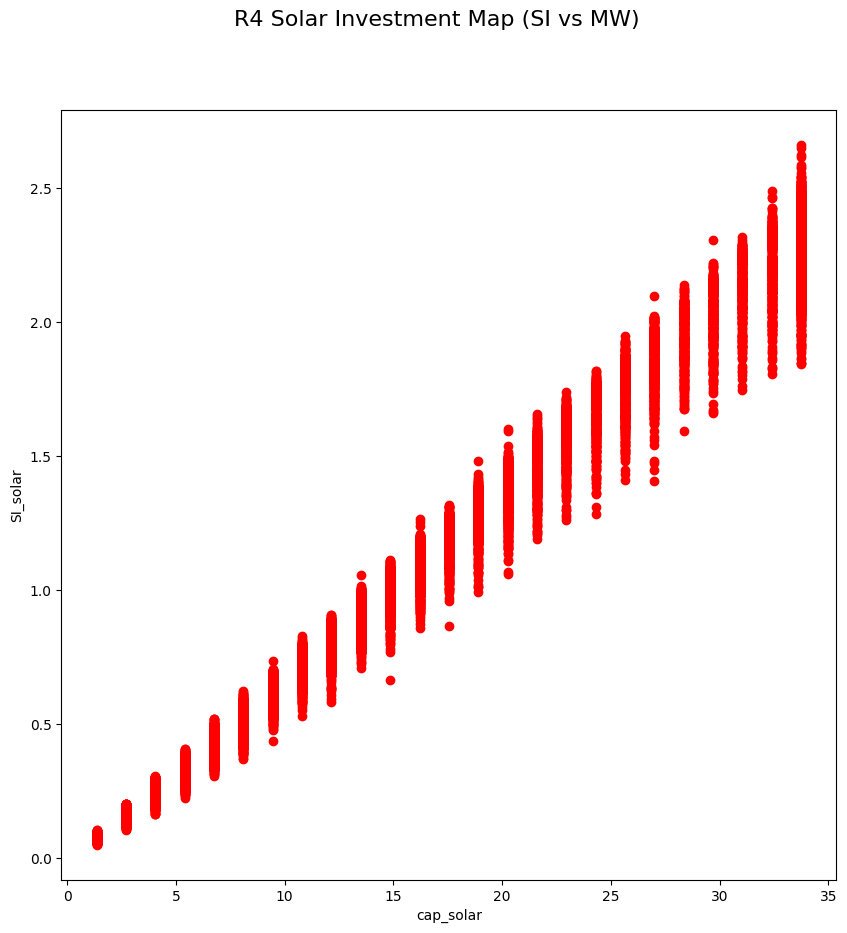

In [16]:
region = 'R4'
specificarea = thailandmap.loc[thailandmap['region'] == region]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['region'] == region].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['region'] == region].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(region + ' Investment Map (MW)', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend = True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend=True,zorder = 2,column = 'cap_solar',cmap = 'Reds')
except:
    None

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(region + ' Investment Map (SI)', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend=True,zorder = 1,column = 'SI_Wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend=True,zorder = 2,column = 'SI_Solar',cmap = 'Reds')
except:
    None

df_wind_scatter = df_wind.loc[df_wind['region'] == region]
df_solar_scatter = df_solar.loc[df_solar['region'] == region]
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(region + ' Wind Investment Map (SI vs MW)', fontsize=16)
try:
    plt.scatter(df_wind_scatter['cap_wind'], df_wind_scatter['SI_Wind'],c='blue')
    plt.xlabel('cap_wind')
    plt.ylabel('SI_wind')
except:
    None

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(region + ' Solar Investment Map (SI vs MW)', fontsize=16)
try:
    plt.scatter(df_solar_scatter['cap_solar'], df_solar_scatter['SI_Solar'],c='red')
    plt.xlabel('cap_solar')
    plt.ylabel('SI_solar')
except:
    None